In [15]:
# Data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




In [17]:
# Load Netflix dataset (file is in the same directory)
df = pd.read_csv('netflix_titles.csv')

# View top 5 rows
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [19]:
# Shape and info
print("Dataset Shape:", df.shape)
df.info()

# Check for missing values
df.isnull().sum()


Dataset Shape: (8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [31]:
# Cleanly fill missing values using dictionary mapping
df.fillna({
    'director': 'Unknown',
    'cast': 'Unknown',
    'country': 'Unknown',
    'rating': 'Unknown',
    'duration': 'Unknown'
}, inplace=True)

# Safely strip and convert 'date_added' (convert all to string first)
df['date_added'] = df['date_added'].astype(str).str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')  # invalid formats will be NaT

# Recheck for remaining missing values
df.isnull().sum()


show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

C:\Users\harik\AppData\Local\Temp\ipykernel_43476\2486262546.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


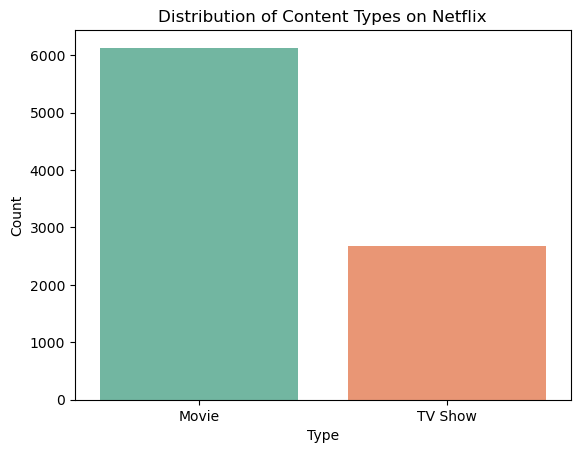

In [33]:
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Distribution of Content Types on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


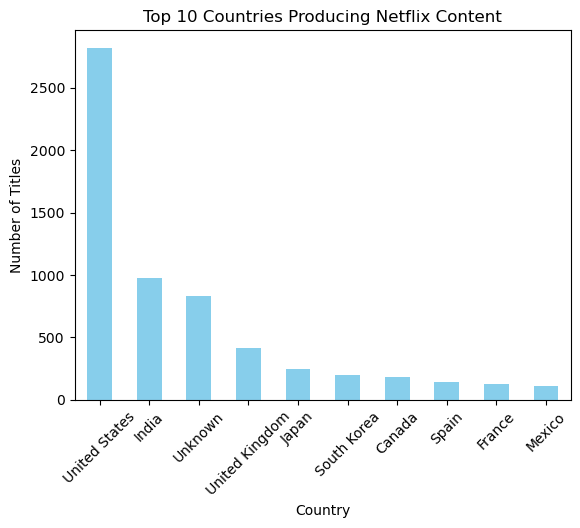

In [35]:
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


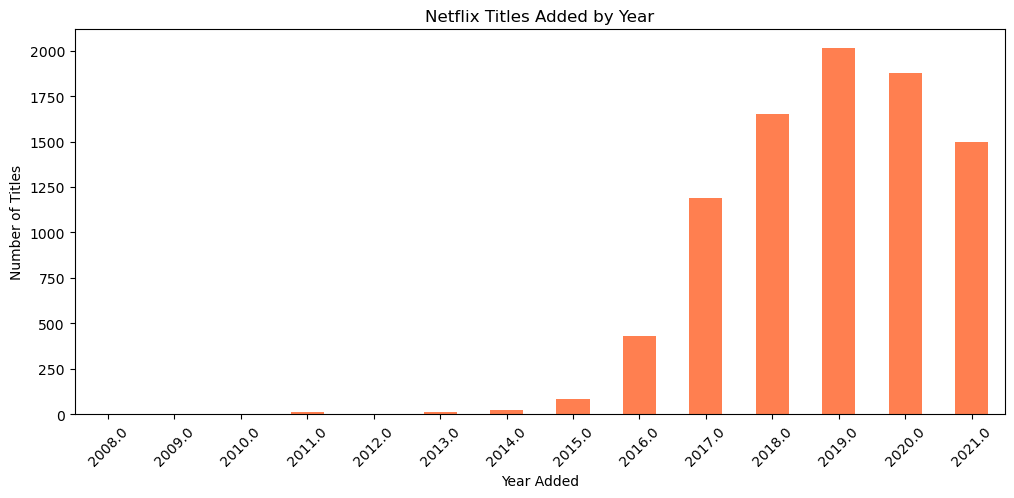

In [37]:
df['year_added'] = df['date_added'].dt.year

df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(12, 5), color='coral')
plt.title('Netflix Titles Added by Year')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


C:\Users\harik\AppData\Local\Temp\ipykernel_43476\2364257489.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index[:10], palette='cool')


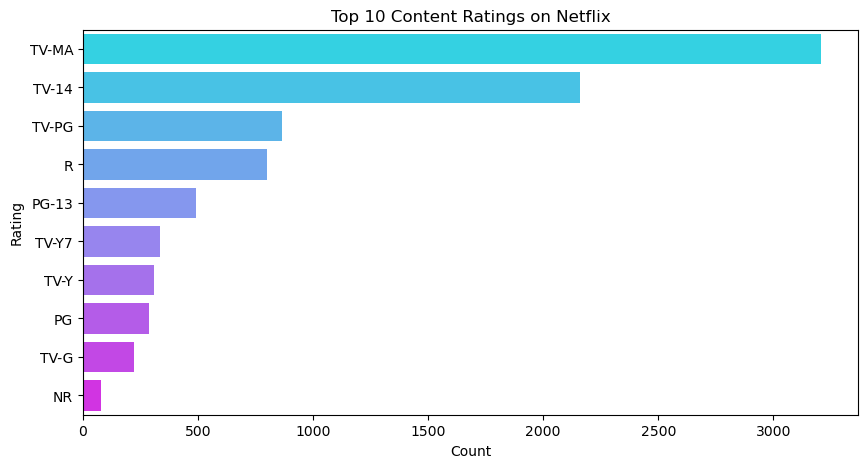

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index[:10], palette='cool')
plt.title('Top 10 Content Ratings on Netflix')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()


In [41]:
# Create a binary target column
df['type_binary'] = df['type'].apply(lambda x: 1 if x == 'Movie' else 0)

# Encode 'country' and 'rating' using LabelEncoder
le_country = LabelEncoder()
le_rating = LabelEncoder()

df['country_encoded'] = le_country.fit_transform(df['country'])
df['rating_encoded'] = le_rating.fit_transform(df['rating'])


In [43]:
# Feature columns
X = df[['country_encoded', 'rating_encoded']]

# Target column
y = df['type_binary']


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [49]:
y_pred = model.predict(X_test)


✅ Accuracy: 0.699205448354143

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.13      0.22       548
           1       0.71      0.95      0.81      1214

    accuracy                           0.70      1762
   macro avg       0.64      0.54      0.51      1762
weighted avg       0.67      0.70      0.63      1762



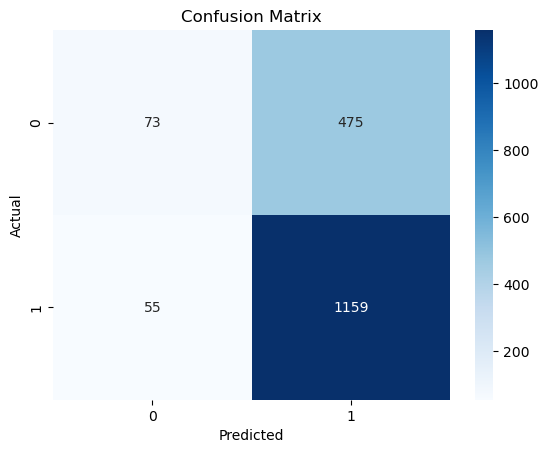

In [51]:
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
